<a href="https://colab.research.google.com/github/puneetasenyurrita-star/120-Final/blob/main/120_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Final Project

**Course:** MATH 120

**Format:** Individual project    

 **Deliverables**
 1. GitHub repository + short write-up (for part II)

> Your updated project proposal
(building on your Part I proposal, now with more detail)
A starter Jupyter/
Colab notebook
showing:

*   load your dataset
*   initial exploration (a few plots or summaries)
*   early ideas toward your methods


 2. A README.md with:


*   project title
*    3–4 sentence summary
*   link to your dataset
*   instructions on how to run your notebook


## Below is GitHub code. This sets up the environment.

In [ ]:
import os
import sys

# Check if running in Google Colab
try:
    import google.colab
    IN_COLAB = True
    print("Running in Google Colab")

    # Clone repository if in Colab
    if not os.path.exists('/content/drive/MyDrive/120-Final/'):
        !git clone https://github.com/puneetasenyurrita-star/120-Final.git

    # Change to project directory
    # The repository is cloned into /content/120-Final by default
    os.chdir('/content/120-Final')

except ImportError:
    IN_COLAB = False
    print("Running locally")

# Add src directory to Python path
if 'src' not in sys.path:
    sys.path.append('src')

print(f"Current working directory: {os.getcwd()}")

Running in Google Colab
Cloning into '120-Final'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 32 (delta 8), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (32/32), 139.01 KiB | 1.67 MiB/s, done.
Resolving deltas: 100% (8/8), done.
Current working directory: /content/120-Final


## Data Loading and Cleaning

In [ ]:
# TBC

## Data Analysis

In [ ]:
# TBC

## Data Visualization

In [ ]:
# TBC

### In the cell below, the dataset is loaded through the mount drive method which contains about 400 songs including remixes and unreleased songs from different albums of legendary music artist Rihanna.


In [ ]:
import pandas as pd

# Load the CSV file directly into a pandas data frame and read the data
df_chat = pd.read_csv('/content/120-Final/data_raw/Rihanna.csv')
df_chat.head()

,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric
0,0,Rihanna,Work,ANTI,2016.0,2016-01-27,rihanna work work work work work work he said ...
1,1,Rihanna,Love on the Brain,ANTI,2016.0,2016-01-28,and you got me like oh what you want from me w...
2,2,Rihanna,Needed Me,ANTI,2016.0,2016-01-28,yg mustard on the beat ho i was good on my o...
3,3,Rihanna,Stay,Unapologetic,2013.0,2013-01-07,rihanna all along it was a fever a cold sweat ...
4,4,Rihanna,Kiss It Better,ANTI,2016.0,2016-01-28,kiss it kiss it better baby kiss it kiss it be...


### The cell below shows a test of just one song being uploaded with it's full associated lyrics.

In [ ]:
import pandas as pd

csv = '/content/drive/MyDrive/120-Final/Rihanna.csv'
df_chat = pd.read_csv(csv)

# Display the full lyrics of the first song in the df_chat data frame by index-based
first_song_lyrics = df_chat.iloc[0]['Lyric']

print(first_song_lyrics)

rihanna work work work work work work he said me haffi work work work work work work he see me do mi dirt dirt dirt dirt dirt dirt so me put in work work work work work work when you ah guh learn learn learn learn learn meh nuh cyar if him hurt hurt hurt hurt hurting   rihanna dry me a desert him nuh time to have you lurking him ah go act like he nuh like it you know i dealt with you the nicest nuh body touch me you nuh righteous nuh badda text me in a crisis i believed all of your dreams adoration you took my heart and my keys and my patience you took my heart on my sleeve for decoration you mistaken my love i brought for you for foundation all that i wanted from you was to give me something that i never had something that you've never seen something that you've never been mmmmm but i wake up and act like nothing's wrong just get ready fi   rihanna work work work work work work he said me haffi work work work work work work he see me do mi dirt dirt dirt dirt dirt dirt so me put in wo

## Sentiment Analyzer for sentiment scores

In [ ]:
import nltk
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the vader_lexicon if not already downloaded
try:
    nltk.data.find('sentiment/vader_lexicon.zip')
except LookupError:
    nltk.download('vader_lexicon')

# instantiate a sentiment classifier
sid = SentimentIntensityAnalyzer()

def get_sentiment_scores(lyric):
    """
    Calculates sentiment scores (negative, neutral, positive, and compound)
    for a given lyric using NLTK's VADER sentiment intensity analyzer.
    """
    return pd.Series(sid.polarity_scores(str(lyric)))

# Apply sentiment analysis to the 'Lyric' column of df_chat using the defined function
df_chat[['neg', 'neu', 'pos', 'compound']] = df_chat['Lyric'].apply(get_sentiment_scores)

# Display the DataFrame with new sentiment scores
display(df_chat.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Unnamed: 0,Artist,Title,Album,Year,Date,Lyric,neg,neu,pos,compound
0,0,Rihanna,Work,ANTI,2016.0,2016-01-27,rihanna work work work work work work he said ...,0.203,0.710,0.088,-0.9974
1,1,Rihanna,Love on the Brain,ANTI,2016.0,2016-01-28,and you got me like oh what you want from me w...,0.166,0.550,0.284,0.9959
2,2,Rihanna,Needed Me,ANTI,2016.0,2016-01-28,yg mustard on the beat ho i was good on my o...,0.232,0.718,0.050,-0.9969
3,3,Rihanna,Stay,Unapologetic,2013.0,2013-01-07,rihanna all along it was a fever a cold sweat ...,0.036,0.911,0.053,0.3189
4,4,Rihanna,Kiss It Better,ANTI,2016.0,2016-01-28,kiss it kiss it better baby kiss it kiss it be...,0.093,0.674,0.234,0.9982


## Songs filtered out by most recent album to descending order.

In [ ]:
unique_albums = df_chat[~df_chat['Album'].isnull()]['Album'].unique()

# for loop iterates each album and every song of the album to display in most recent to least
for album in unique_albums:
    print(f"\n--- Album: {album} ---")
    album_songs = df_chat[df_chat['Album'] == album]

    for index, row in album_songs.iterrows():
        song_title = row['Title']
        song_lyrics = row['Lyric']
        print(f"\nTitle: {song_title}")
        print(f"Lyrics:\n{song_lyrics}")


--- Album: ANTI ---

Title: Work
Lyrics:
rihanna work work work work work work he said me haffi work work work work work work he see me do mi dirt dirt dirt dirt dirt dirt so me put in work work work work work work when you ah guh learn learn learn learn learn meh nuh cyar if him hurt hurt hurt hurt hurting   rihanna dry me a desert him nuh time to have you lurking him ah go act like he nuh like it you know i dealt with you the nicest nuh body touch me you nuh righteous nuh badda text me in a crisis i believed all of your dreams adoration you took my heart and my keys and my patience you took my heart on my sleeve for decoration you mistaken my love i brought for you for foundation all that i wanted from you was to give me something that i never had something that you've never seen something that you've never been mmmmm but i wake up and act like nothing's wrong just get ready fi   rihanna work work work work work work he said me haffi work work work work work work he see me do mi dir

## Now let's analyze the average sentiment scores which include negative, neutral, positive, and compound for each album.

In [ ]:
sentiment_columns = ['neg', 'neu', 'pos', 'compound']
df_album_sentiment = df_chat.groupby('Album')[sentiment_columns].mean().reset_index()

display(df_album_sentiment.head())

,Album,neg,neu,pos,compound
0,A Girl Like Me,0.101375,0.750938,0.147625,0.388856
1,A Girl Like Me (German Deluxe Edition Bonus Disc),0.116333,0.717667,0.166000,0.985700
2,ANTI,0.107750,0.692063,0.200250,0.536375
3,California King Bed (Remixes),0.039556,0.913000,0.047556,0.283478
4,Consideration (Dance Remixes),0.074167,0.793333,0.132667,0.327917


In [ ]:
display(df_album_sentiment)

,Album,neg,neu,pos,compound
0,A Girl Like Me,0.101375,0.750938,0.147625,0.388856
1,A Girl Like Me (German Deluxe Edition Bonus Disc),0.116333,0.717667,0.166000,0.985700
2,ANTI,0.107750,0.692063,0.200250,0.536375
3,California King Bed (Remixes),0.039556,0.913000,0.047556,0.283478
4,Consideration (Dance Remixes),0.074167,0.793333,0.132667,0.327917
5,Desperado (Dance Remixes),0.043250,0.732000,0.224750,0.990850
6,Diamonds (Remixes),0.004000,0.362875,0.633000,0.999775
7,Disturbia (Remixes),0.059400,0.888400,0.052600,-0.000520
8,Don’t Stop the Music (Remixes),0.009750,0.648500,0.342250,0.999588
9,Good Girl Gone Bad,0.092786,0.740500,0.166786,0.562907


## Data Frame below shows the previous data frame sorted from highest sentiment score to lowest of each album but now with the average sentiment scores.


In [ ]:
# Sort the DataFrame by compound sentiment for better visualization
df_album_sentiment_sorted = df_album_sentiment.sort_values(by='compound', ascending=False)

display(df_album_sentiment_sorted.head())

,Album,neg,neu,pos,compound
27,Ponzi Scheme,0.03700,0.532000,0.43000,0.999900
6,Diamonds (Remixes),0.00400,0.362875,0.63300,0.999775
8,Don’t Stop the Music (Remixes),0.00975,0.648500,0.34225,0.999588
38,Stripped: Raw & Real,0.00000,0.487000,0.51300,0.999400
25,Now That’s What I Call Christmas! 4 [US],0.00000,0.712000,0.28800,0.998800


## To visualize the average sentiment one way this can be done is in a bar chart.

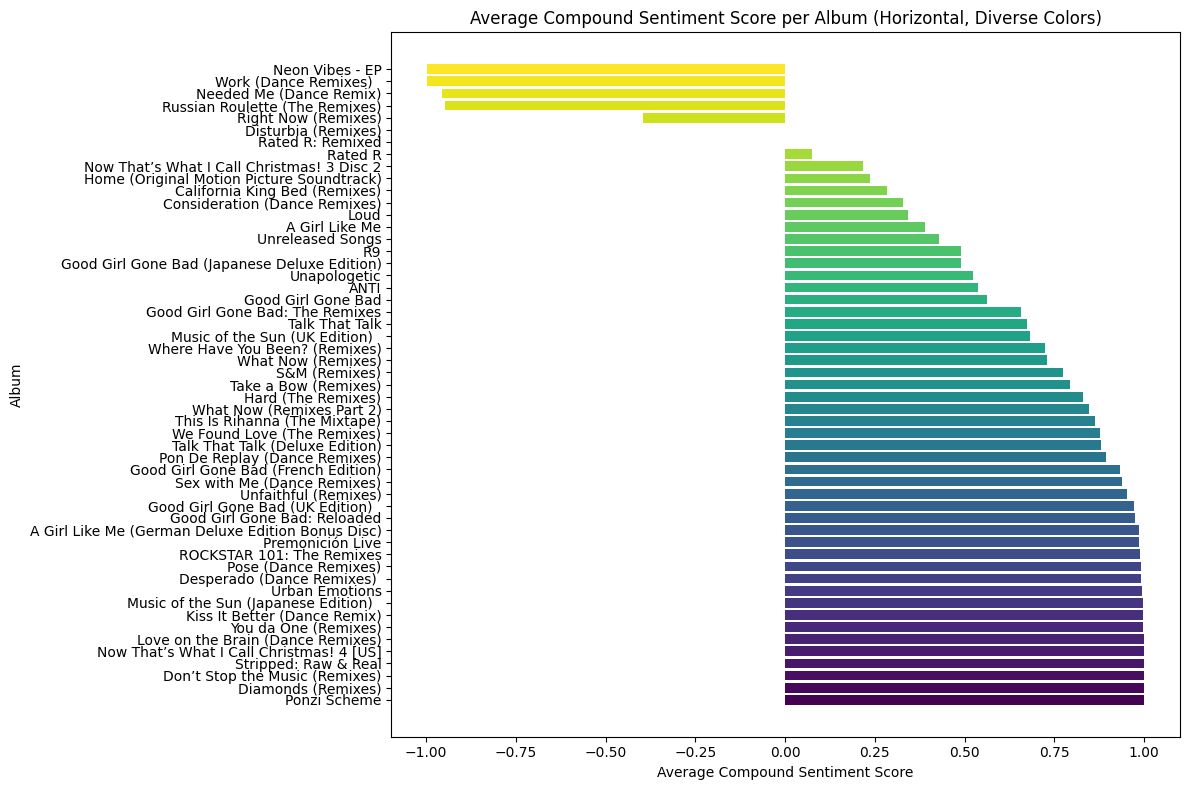

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the DataFrame by compound sentiment for better visualization
df_album_sentiment_sorted = df_album_sentiment.sort_values(by='compound', ascending=False)

# Generate a color map for each album
colors = plt.cm.viridis(np.linspace(0, 1, len(df_album_sentiment_sorted)))

plt.figure(figsize=(12, 8)) # Adjusted figure size for horizontal bars
plt.barh(df_album_sentiment_sorted['Album'], df_album_sentiment_sorted['compound'], color=colors)
plt.ylabel('Album') # Swapped labels
plt.xlabel('Average Compound Sentiment Score') # Swapped labels
plt.title('Average Compound Sentiment Score per Album (Horizontal, Diverse Colors)')
plt.tight_layout()
plt.show()

## Method Interpretation

* The sentiment analysis reveals significant variations in emotional tone across Rihanna's albums. Notably, albums such as Stripped: Raw & Real and Now That’s What I Call Christmas! 4 [US] have the highest average compound sentiment scores which mean they have a positive emotional which results in lyrics in these albums being highly of positive sentiment.

* But, Rihanna's albums such as Rated R and Now That’s What I Call Christmas! 3 Disc 2 have the lowest average compound sentiment scores which means that songs from these albums tend to have a more neutral or even slightly negative emotional tone overall, in comparison to others.

* Looking at the individual sentiment components of albums with high positive compound scores like Stripped: Raw & Real, have a high positive score (0.513) and a low negative score (0.000) but albums like Urban Emotions have a relatively high negative score (0.177) but still maintain a high compound score (0.9942), which can be because of an even higher positive score (0.285) or a balance with neutral (0.537) that doesn't drag the compound score down significantly for individual songs.

* Overall, as seen from the bar chart, each album is different in that it is unique where there is also a diverse range of sentiment present through all of her songs aka discography.